# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)
%matplotlib inline

In [2]:
digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (537, 64)
y shape:  (537,)


載入 相關套件 並 執行 PCA 實驗 ...

In [3]:
# 設定模型估計參數
pca = decomposition.PCA(n_components=3)

X shape:  (537, 3)


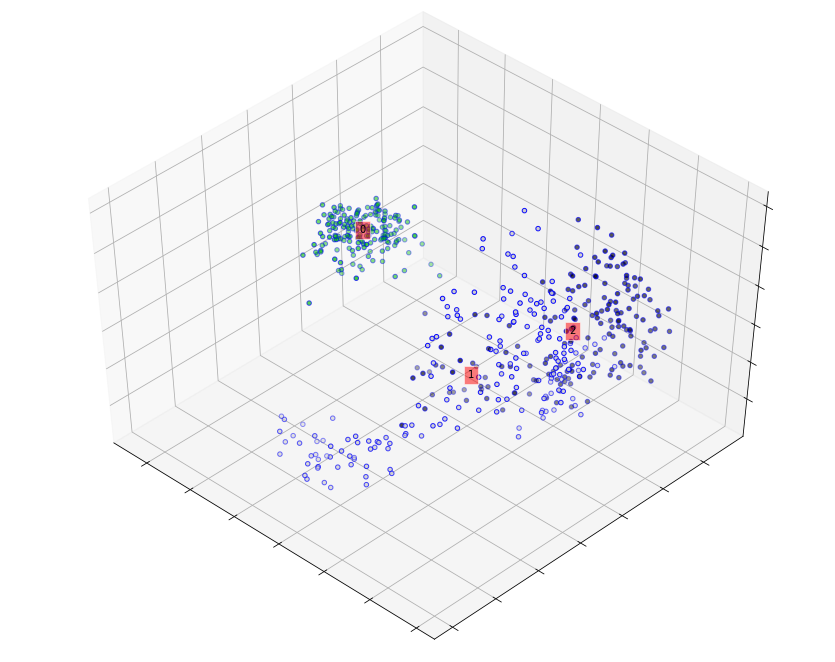

In [4]:
# 資料建模 並 視覺化 結果
pca.fit(X)
X = pca.transform(X)
print("X shape: ", X.shape)

fig = plt.figure(1, figsize=(12, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()


for name, label in [('0', 0), ('1', 1), ('2', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='r'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='b')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()